In [1]:
from rdkit.Chem import Descriptors,QED
from rdkit import Chem
from rdkit.Chem import  Draw
from rdkit.Chem.Draw import IPythonConsole #Needed to show molecules
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions #Only needed if modifying defaults
import sascorer
import pandas as pd
import torch

In [9]:
with open("D:/本科/try3/result.txt", 'r') as f:
    raw = [line.strip().split()[0] for line in (f.readlines())]
    result = list(set(raw))
with open("D:/本科/try3/data/test.txt", 'r') as f:
    data = [line.strip().split()[0] for line in (f.readlines())]

In [51]:
with open("D:/本科/try3/data/test1.txt", 'r') as f:
    raw = [line.strip().split()[0] for line in (f.readlines())]
    result = list(set(raw))
with open("D:/本科/try3/data/test1.txt", 'r') as f:
    data = [line.strip().split()[0] for line in (f.readlines())]

In [52]:
len(result)

100

In [53]:
len(raw)

100

In [54]:
data_mols = [Chem.MolFromSmiles(smiles) for smiles in data]

In [55]:
mols = [Chem.MolFromSmiles(smiles) for smiles in result]
row_mols = [Chem.MolFromSmiles(smiles) for smiles in  raw]

C:\ProgramData\Anaconda3\envs\graphormer\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:243: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


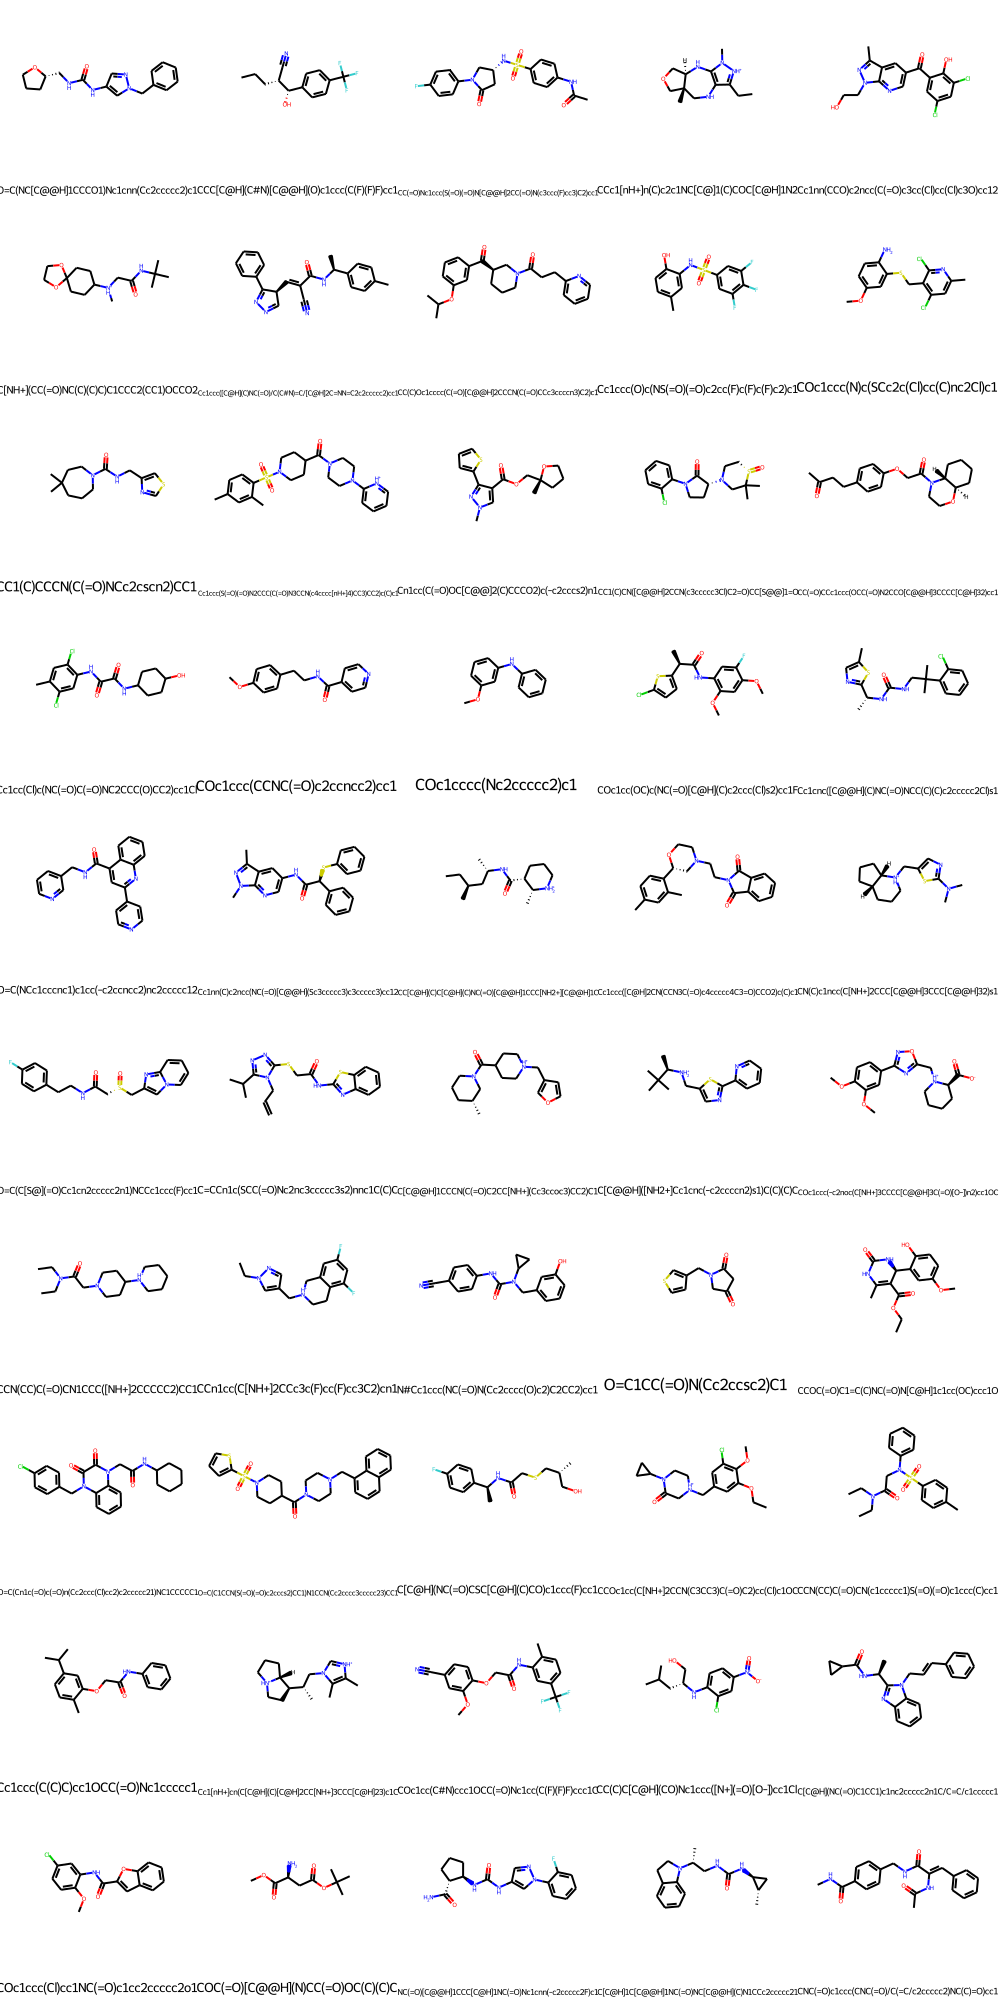

In [56]:
Draw.MolsToGridImage(mols, molsPerRow=5, legends=result)

In [57]:
len(raw)

100

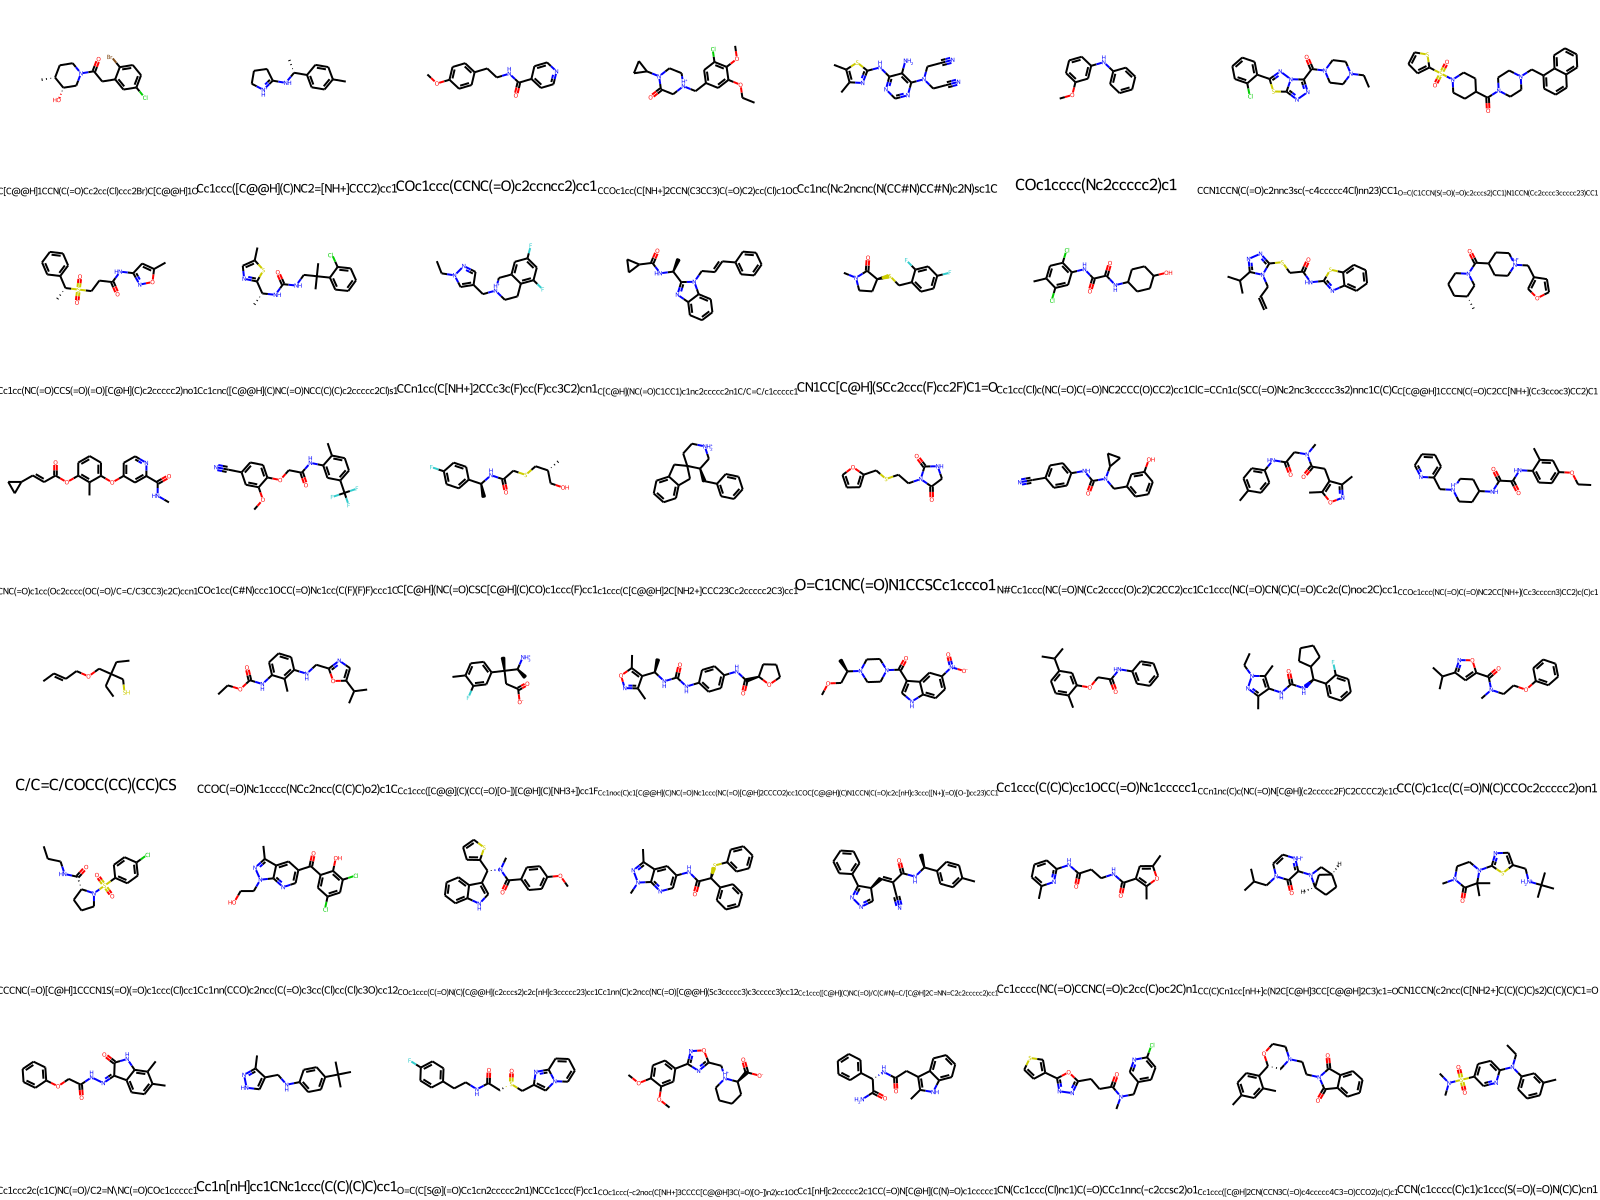

In [61]:
Draw.MolsToGridImage(row_mols[:48], molsPerRow=8, legends=raw)

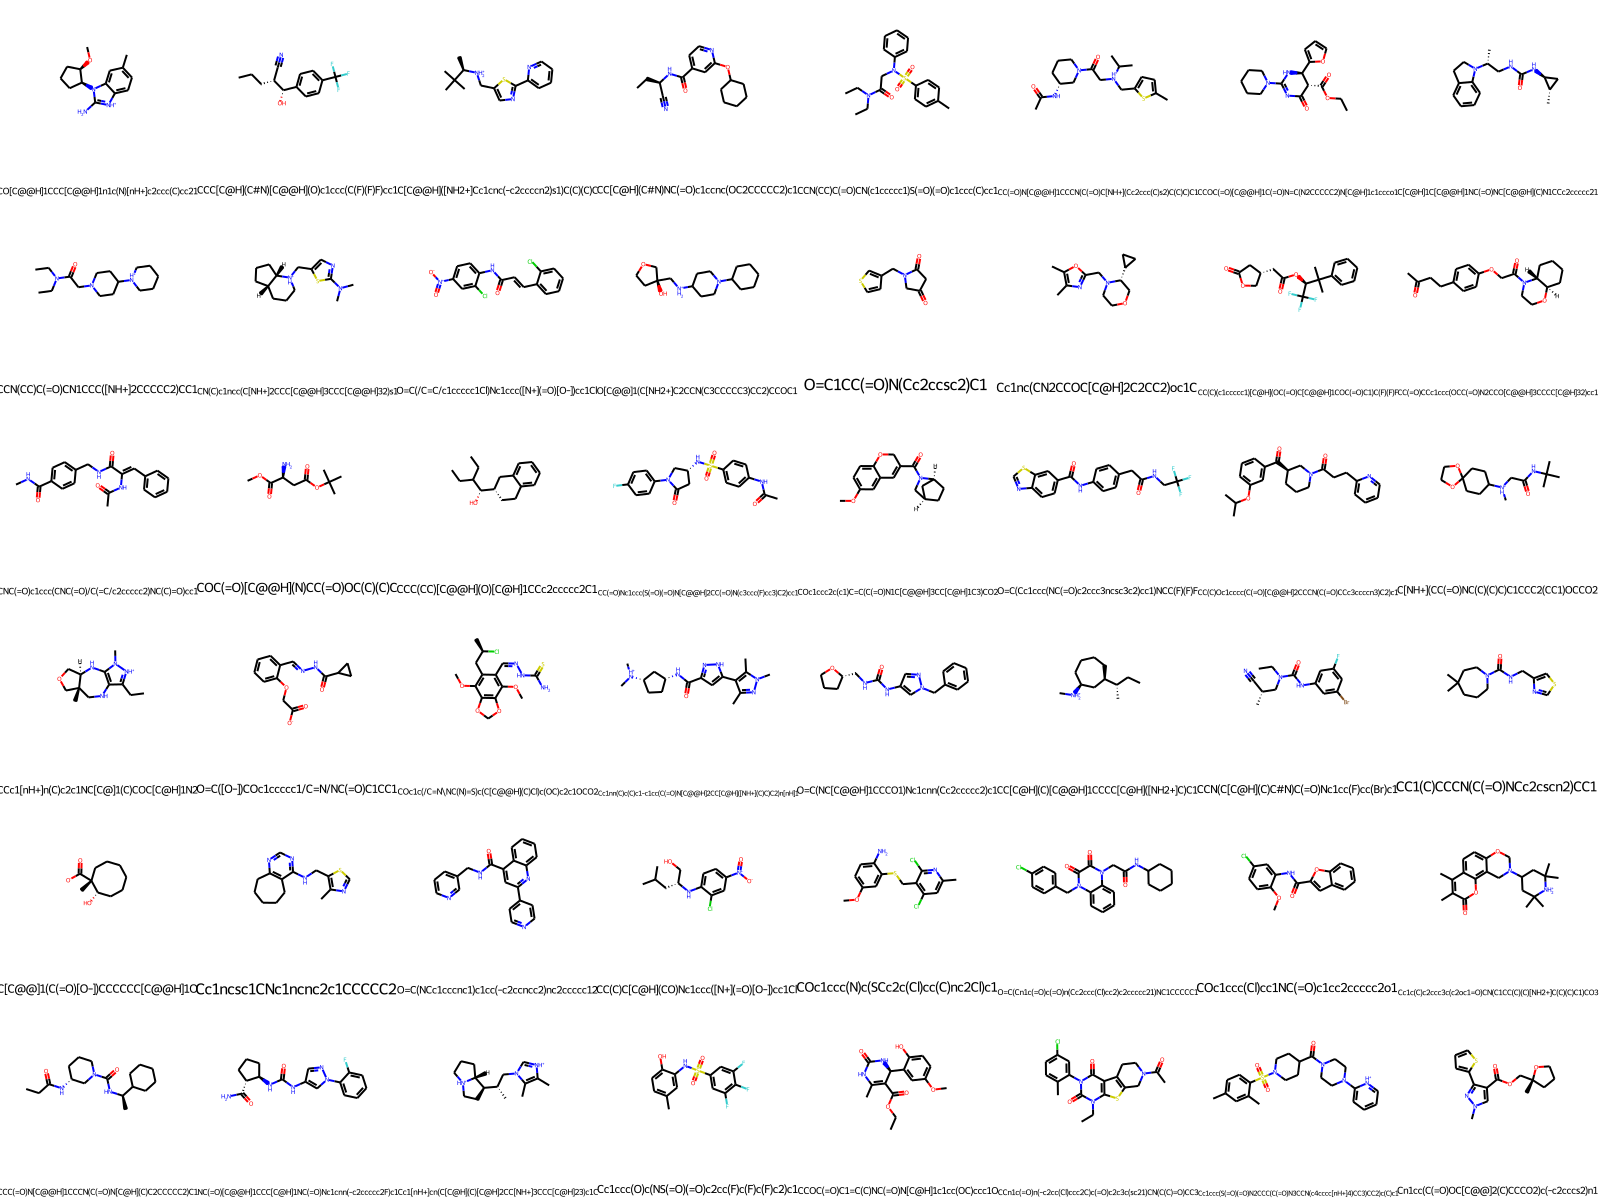

In [59]:
Draw.MolsToGridImage(row_mols[48:96], molsPerRow=8, legends=raw[48:96])

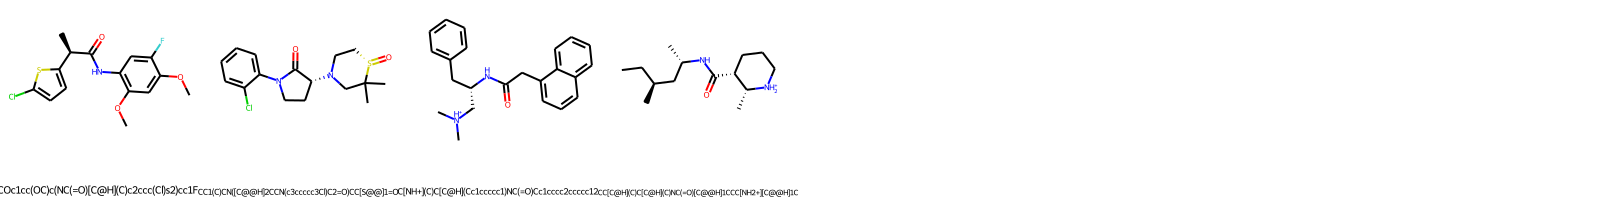

In [62]:
Draw.MolsToGridImage(row_mols[96:], molsPerRow=8, legends=raw[96:])

In [63]:
res_qedps=[torch.tensor(list(QED.properties(mol))) for mol in mols]
res_qedps=torch.stack(list(res_qedps))
res_qeds =torch.tensor([QED.qed(mol,QED.properties(mol)) for mol in mols])
res_sas = [sascorer.calculateScore(mol) for mol in mols]
res_log_ps = torch.tensor([Descriptors.MolLogP(mol) for mol in mols])

In [65]:
res_df = {"smiles": result, "log_P": res_log_ps,  "SA":res_sas,   "QED": res_qeds[:],"MW": res_qedps[:,0]}
res_df = pd.core.frame.DataFrame(res_df)
res_df.to_csv('new1.csv')

In [37]:
qedps=[torch.tensor(list(QED.properties(mol))) for mol in data_mols]
qeds =torch.tensor([QED.qed(mol,QED.properties(mol)) for mol in data_mols])
sas = [sascorer.calculateScore(mol) for mol in data_mols]
qedps=torch.stack(list(qedps))
log_ps = torch.tensor([Descriptors.MolLogP(mol) for mol in data_mols])

In [38]:
df = {"smiles": data, "MW": qedps[:,0], "log_P": qedps[:,1], "QED": qeds[:], "SA":sas}
df = pd.core.frame.DataFrame(df)
df

,smiles,MW,log_P,QED,SA
0,C[C@@H]1CCN(C(=O)Cc2cc(Cl)ccc2Br)C[C@@H]1O,346.652008,2.87430,0.894861,2.990752
1,Cc1ccc([C@@H](C)NC2=[NH+]CCC2)cc1,203.309006,0.91852,0.496437,3.797551
2,COc1ccc(CCNC(=O)c2ccncc2)cc1,256.304993,2.06270,0.854775,1.588535
3,CCOc1cc(C[NH+]2CCN(C3CC3)C(=O)C2)cc(Cl)c1OC,339.842987,1.13680,0.921163,3.907991
4,Cc1nc(Nc2ncnc(N(CC#N)CC#N)c2N)sc1C,314.377991,1.72930,0.752672,3.055249
...,...,...,...,...,...
95,Cn1cc(C(=O)OC[C@@]2(C)CCCO2)c(-c2cccs2)n1,306.386993,2.87450,0.996834,3.259481
96,COc1cc(OC)c(NC(=O)[C@H](C)c2ccc(Cl)s2)cc1F,343.807007,4.30000,0.910198,2.739513
97,CC1(C)CN([C@@H]2CCN(c3ccccc3Cl)C2=O)CC[S@@]1=O,340.876007,2.28820,0.919337,3.794069
98,C[NH+](C)C[C@H](Cc1ccccc1)NC(=O)Cc1cccc2ccccc12,347.481995,2.25430,0.863626,3.041623


In [39]:
mean_qedps=torch.mean(qedps, dim=0)
mean_qeds =torch.mean(qeds)
mean_sas = torch.mean(torch.tensor(sas))
mean_log_ps = torch.mean(log_ps)

In [40]:
mean_res_qedps=torch.mean(res_qedps, dim=0)
mean_res_qeds =torch.mean(res_qeds)
mean_res_sas = torch.mean(torch.tensor(res_sas))
mean_res_log_ps = torch.mean(res_log_ps)

In [47]:
mean_log_ps,mean_sas,mean_qeds,mean_qedps[0]

(tensor(2.4699), tensor(3.0449), tensor(0.8215), tensor(312.6964))

In [48]:
mean_res_log_ps,mean_res_sas,mean_res_qeds,mean_res_qedps[0]

(tensor(0.1499), tensor(3.1641), tensor(0.0984), tensor(30.7127))